## 1. Introduction
<p><img src="https://assets.datacamp.com/production/project_1197/img/google_play_store.png" alt="Google Play logo"></p>
<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>

In [1]:
from statistics import variance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
df1 = pd.read_csv('datasets/apps.csv')
df2 = pd.read_csv('datasets/user_reviews.csv')

In [2]:
df2.head()

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


In [3]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,"June 20, 2018"


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   object 
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 679.3+ KB


In [5]:
df1['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [6]:
df1['Installs']=df1['Installs'].str.replace('+','')

C:\Users\ishan\AppData\Local\Temp/ipykernel_8100/2013407961.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Installs']=df1['Installs'].str.replace('+','')


In [7]:
df1['Installs']=df1['Installs'].str.replace(',','')

In [8]:
df1['Installs']=df1['Installs'].astype('int')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   int32  
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 641.5+ KB


In [10]:
apps=df1

In [11]:
app_category_info=apps.groupby(['Category']).agg({'App':'count','Price':'mean','Rating':'mean'})

In [12]:
app_category_info.columns=['Number of apps','Average price','Average rating']

In [13]:
app_category_info

,Number of apps,Average price,Average rating
Category,,,
ART_AND_DESIGN,64,0.093281,4.357377
AUTO_AND_VEHICLES,85,0.158471,4.190411
BEAUTY,53,0.000000,4.278571
BOOKS_AND_REFERENCE,222,0.539505,4.344970
BUSINESS,420,0.417357,4.098479
COMICS,56,0.000000,4.181481
COMMUNICATION,315,0.263937,4.121484
DATING,171,0.160468,3.970149
EDUCATION,119,0.150924,4.364407


In [14]:
merged=df1.merge(df2,left_on='App',right_on='App')

In [15]:
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",A kid's excessive ads. The types ads allowed a...,Negative,-0.250
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",It bad >:(,Negative,-0.725
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",like,Neutral,0.000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",I love colors inspyering,Positive,0.500


In [16]:
finan=merged[merged['Category']=='FINANCE']
free=finan[finan['Type']=='Free']

In [17]:
grouped=free.groupby('App').agg({'Sentiment Score':'mean'})

In [18]:
top_10_user_feedback=grouped.sort_values(by='Sentiment Score',ascending=False).head(10)

In [19]:
top_10_user_feedback

,Sentiment Score
App,
BBVA Spain,0.515086
Associated Credit Union Mobile,0.388093
BankMobile Vibe App,0.353455
A+ Mobile,0.329592
Current debit card and app made for teens,0.327258
BZWBK24 mobile,0.326883
"Even - organize your money, get paid early",0.283929
Credit Karma,0.270052
Fortune City - A Finance App,0.266966


In [20]:
top_5_best_categories_acc_to_ratings=app_category_info.sort_values(by='Average rating',ascending=False)['Average rating'].head(5)

In [21]:
top_5_best_categories_acc_to_ratings

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
Name: Average rating, dtype: float64

In [22]:
most_apps_grouped_category=app_category_info.sort_values(by='Number of apps',ascending=False).head(5)

In [23]:
most_apps_grouped_category

,Number of apps,Average price,Average rating
Category,,,
FAMILY,1832,1.309967,4.179664
GAME,959,0.296465,4.247368
TOOLS,827,0.323156,4.039554
BUSINESS,420,0.417357,4.098479
MEDICAL,395,2.520759,4.166552


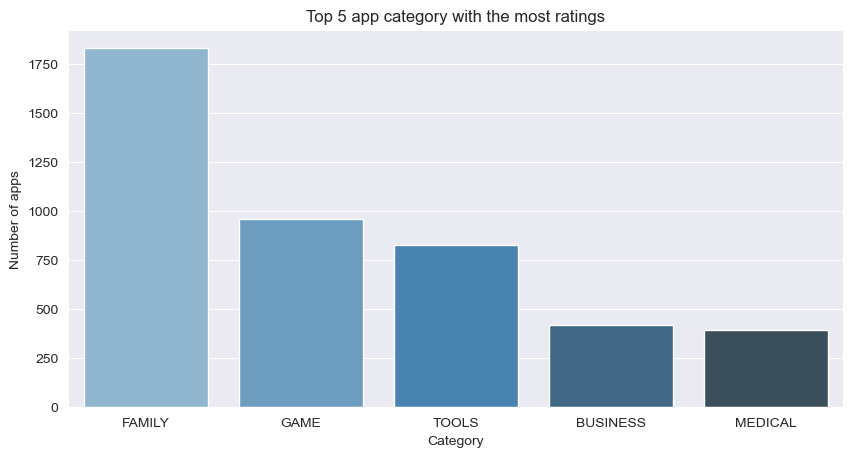

In [24]:
fig,ax=plt.subplots(figsize=(10,5),dpi=100)
sns.barplot(x=most_apps_grouped_category.index,y=most_apps_grouped_category['Number of apps'],palette="Blues_d",ax=ax)
plt.title("Top 5 app category with the most ratings")
plt.show()

Average rating of all apps :4.173243045387998


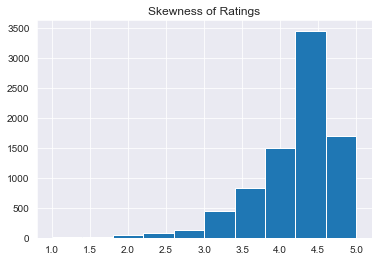

The distribution is right skewed


In [25]:
print(f"Average rating of all apps :{apps['Rating'].mean()}")
plt.hist(apps['Rating']);
plt.title("Skewness of Ratings")
plt.show()
print(f"The distribution is right skewed")

In [26]:
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",A kid's excessive ads. The types ads allowed a...,Negative,-0.250
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",It bad >:(,Negative,-0.725
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",like,Neutral,0.000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",I love colors inspyering,Positive,0.500


In [27]:
merged=merged.dropna(subset=['Sentiment Score'])

Variance of Sentiment Score :0.12254325341233373


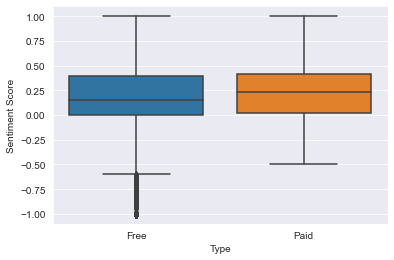

In [28]:
sns.boxplot(x='Type',y='Sentiment Score',data=merged)
print(f"Variance of Sentiment Score :{variance(merged['Sentiment Score'])}")
plt.show()